## Importing Dataset and Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [61]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [62]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Understanding the data/ Null values/ Deleting some columns.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There don't seem to be any null values in the data.

Let us go one by one over each column to understand and eliminate the columns which are not needed.

Age - It is the age of the employee.

Attrition - Our Target variable.

Business Travel - How often the employee needs to travel for the company.

Daily Rate - Salary of an employee per day.

Department - The department in the company.

DistanceFromHome - It is the distance of the office from the employee's home.

Education - The level of education the employee has.

EducationField - The field of education.

EmployeeCount - It is the number of employees (Delete)

Employee Number - It is the number of employee in the company (Delete)

EnvironmentSatisfaction - Score value for satisfaction .

Gender - Male/Female

HourlyRate - HOURLY SALARY

Job Involvement - How much involved is the employee in the job.

Job level - Level of the job.

Job Role - The job role of the employee.

Job Satisfaction - How satisfied is the employee with his job ?

Marital Status - Marital status of the employee.

Monthly Income - Salary of the employee.

Monthly Rate - Monthly rate of the employee.

Numcompanies Worked - Number of companies the employee has worked at.

Over18 - Is the employee over 18 ?

OverTime - Does the employee work overtime ?

Percent Salary Hike - Salary hike.

Performance rating - The performance of the employee.

Relations Satisfaction - How satisfied is the employee with his relations ?

Standard Hours - Working hours.

Stock Options Level - Stock options in the package.

Total working years - Total years the employee has worked.

Training Times Last Year - No. of times the employee has taken training.

Work Life Balance - Time spent outside work.

Years at Company - No. of years spent in the company.

Years in current role - No.of years spent on the same position.

Years since last promotion - Years since the last promotion.

Years with current Manager - Years spent with the current manager.

In [64]:
df['JobInvolvement'].unique()

array([3, 2, 4, 1])

Based on the understanding we can get rid of 4 columns as of now.

1.) Over18 - We have the age column we do not need this column.

2.) Employee Count - The only unique value is 1 as only 1 employee can have a unique set of parameters.

3.) Employee Number - Basically employee ID that we do not need.

4.) StandardHours - Even employee has the same working hours i.e 80.

In [65]:
df.drop(['Over18','EmployeeCount','EmployeeNumber', 'StandardHours'],axis=1,inplace=True)

## Converting the categorical columns to numerical using Label Encoder

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

Attrition

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

In [68]:
le.classes_, le.transform(le.classes_)

(array(['No', 'Yes'], dtype=object), array([0, 1]))

BusinessTravel

In [69]:
le = LabelEncoder()
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])

In [70]:
le.classes_, le.transform(le.classes_)

(array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object),
 array([0, 1, 2]))

Department

In [71]:
le = LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])

In [72]:
le.classes_, le.transform(le.classes_)

(array(['Human Resources', 'Research & Development', 'Sales'], dtype=object),
 array([0, 1, 2]))

Education Field

In [73]:
le = LabelEncoder()
df['EducationField'] = le.fit_transform(df['EducationField'])

In [74]:
le.classes_, le.transform(le.classes_)

(array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
        'Other', 'Technical Degree'], dtype=object),
 array([0, 1, 2, 3, 4, 5]))

Gender

In [75]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [76]:
le.classes_, le.transform(le.classes_)

(array(['Female', 'Male'], dtype=object), array([0, 1]))

Job Role

In [77]:
le = LabelEncoder()
df['JobRole'] = le.fit_transform(df['JobRole'])

In [78]:
le.classes_, le.transform(le.classes_)

(array(['Healthcare Representative', 'Human Resources',
        'Laboratory Technician', 'Manager', 'Manufacturing Director',
        'Research Director', 'Research Scientist', 'Sales Executive',
        'Sales Representative'], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

Marital Status

In [79]:
le = LabelEncoder()
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])

In [80]:
le.classes_, le.transform(le.classes_)

(array(['Divorced', 'Married', 'Single'], dtype=object), array([0, 1, 2]))

OverTime

In [81]:
le = LabelEncoder()
df['OverTime'] = le.fit_transform(df['OverTime'])

In [82]:
le.classes_, le.transform(le.classes_)

(array(['No', 'Yes'], dtype=object), array([0, 1]))

Now that we have converted all the columns to numerical data, we can procede ahead.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

## Splitting the dataset between train and test

In [84]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.2, stratify = df['Attrition'], random_state = 42)

In [85]:
train_set

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1194,47,0,2,1225,2,2,4,1,2,0,...,3,3,3,29,2,3,3,2,1,2
128,22,0,2,594,1,2,1,5,3,1,...,3,3,1,3,2,3,2,1,2,1
810,46,0,2,406,2,3,1,2,1,1,...,3,4,1,23,3,3,12,9,4,9
478,25,0,2,622,2,13,1,3,2,1,...,3,3,0,7,1,3,7,4,0,6
491,43,0,1,1001,1,9,5,3,4,1,...,3,2,1,10,3,3,8,7,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,23,1,2,427,2,7,3,1,3,1,...,4,2,1,3,2,3,3,2,0,2
963,38,0,2,1009,2,2,2,1,2,0,...,3,4,1,11,3,3,7,7,1,7
734,22,0,2,217,1,8,1,1,2,1,...,3,1,1,4,3,2,4,3,1,1
1315,36,0,2,430,1,2,4,4,4,0,...,4,4,1,15,2,3,1,0,0,0


In [86]:
test_set

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1061,24,0,0,830,2,13,2,1,4,0,...,3,3,1,1,2,3,1,0,0,0
891,44,0,2,1117,1,2,1,1,1,0,...,3,4,1,10,5,3,10,5,7,7
456,31,0,2,688,2,7,3,1,3,1,...,4,3,1,10,3,2,5,4,0,1
922,44,0,2,1199,1,4,2,1,3,1,...,3,4,2,26,4,2,25,9,14,13
69,36,1,2,318,1,9,3,3,4,1,...,3,1,1,2,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,43,0,2,244,0,2,3,1,2,1,...,3,2,0,10,5,3,9,7,1,8
1352,44,0,2,170,1,1,4,1,2,1,...,3,4,1,10,5,3,2,0,2,2
1236,36,1,2,1456,2,13,5,2,2,1,...,3,2,3,16,3,3,2,2,2,2
1023,56,0,2,1255,1,1,2,1,1,0,...,4,4,1,5,3,4,3,2,1,0


In [87]:
train_set['Attrition'].value_counts() / sum(train_set['Attrition'].value_counts())

,count
Attrition,
0,0.838435
1,0.161565


In [88]:
test_set['Attrition'].value_counts() / sum(test_set['Attrition'].value_counts())

,count
Attrition,
0,0.840136
1,0.159864


## Descriptions and Visualizations

In [89]:
train_set.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,36.998299,0.161565,1.599490,803.991497,1.268707,9.357993,2.906463,2.263605,2.716837,0.598639,...,3.157313,2.738946,0.790816,11.364796,2.760204,2.757653,7.050170,4.231293,2.182823,4.196429
std,9.178142,0.368208,0.670573,401.339423,0.527611,8.179803,1.027996,1.347111,1.088707,0.490382,...,0.364250,1.087201,0.845786,7.801391,1.256262,0.718113,6.086612,3.569503,3.215348,3.564795
min,18.000000,0.000000,0.000000,103.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,467.750000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,799.500000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,37.000000,17.000000,15.000000,17.000000


Univariate Analysis

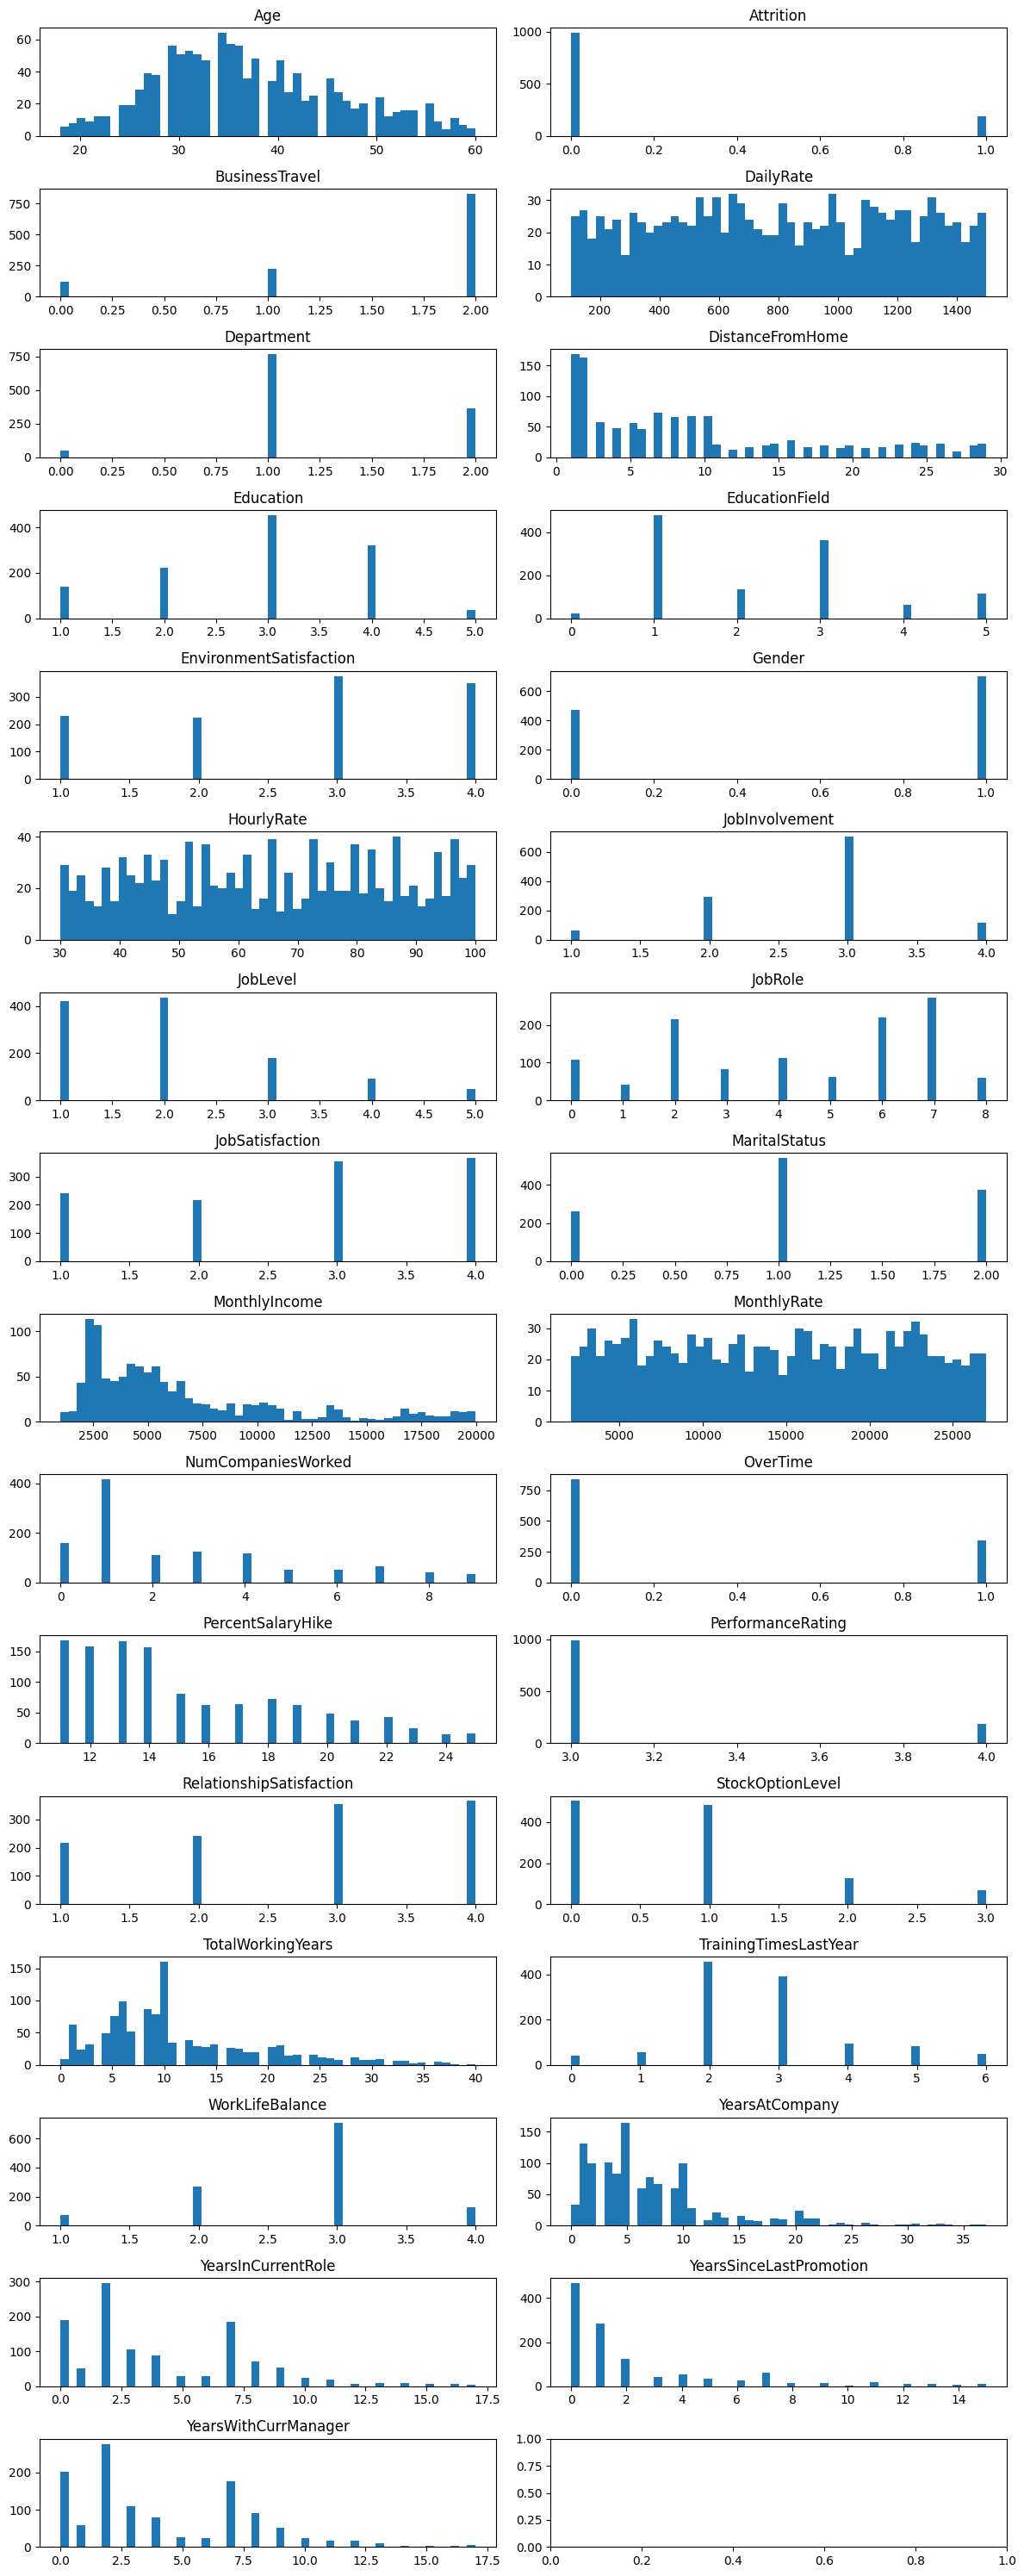

In [93]:
num_histograms = 31
num_cols = 2
num_rows = 16
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 30))

axes = axes.flatten()
for i, col in enumerate(train_set.columns[:num_histograms]):
    axes[i].hist(train_set[col], bins=50)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Boxplot for outlier detection

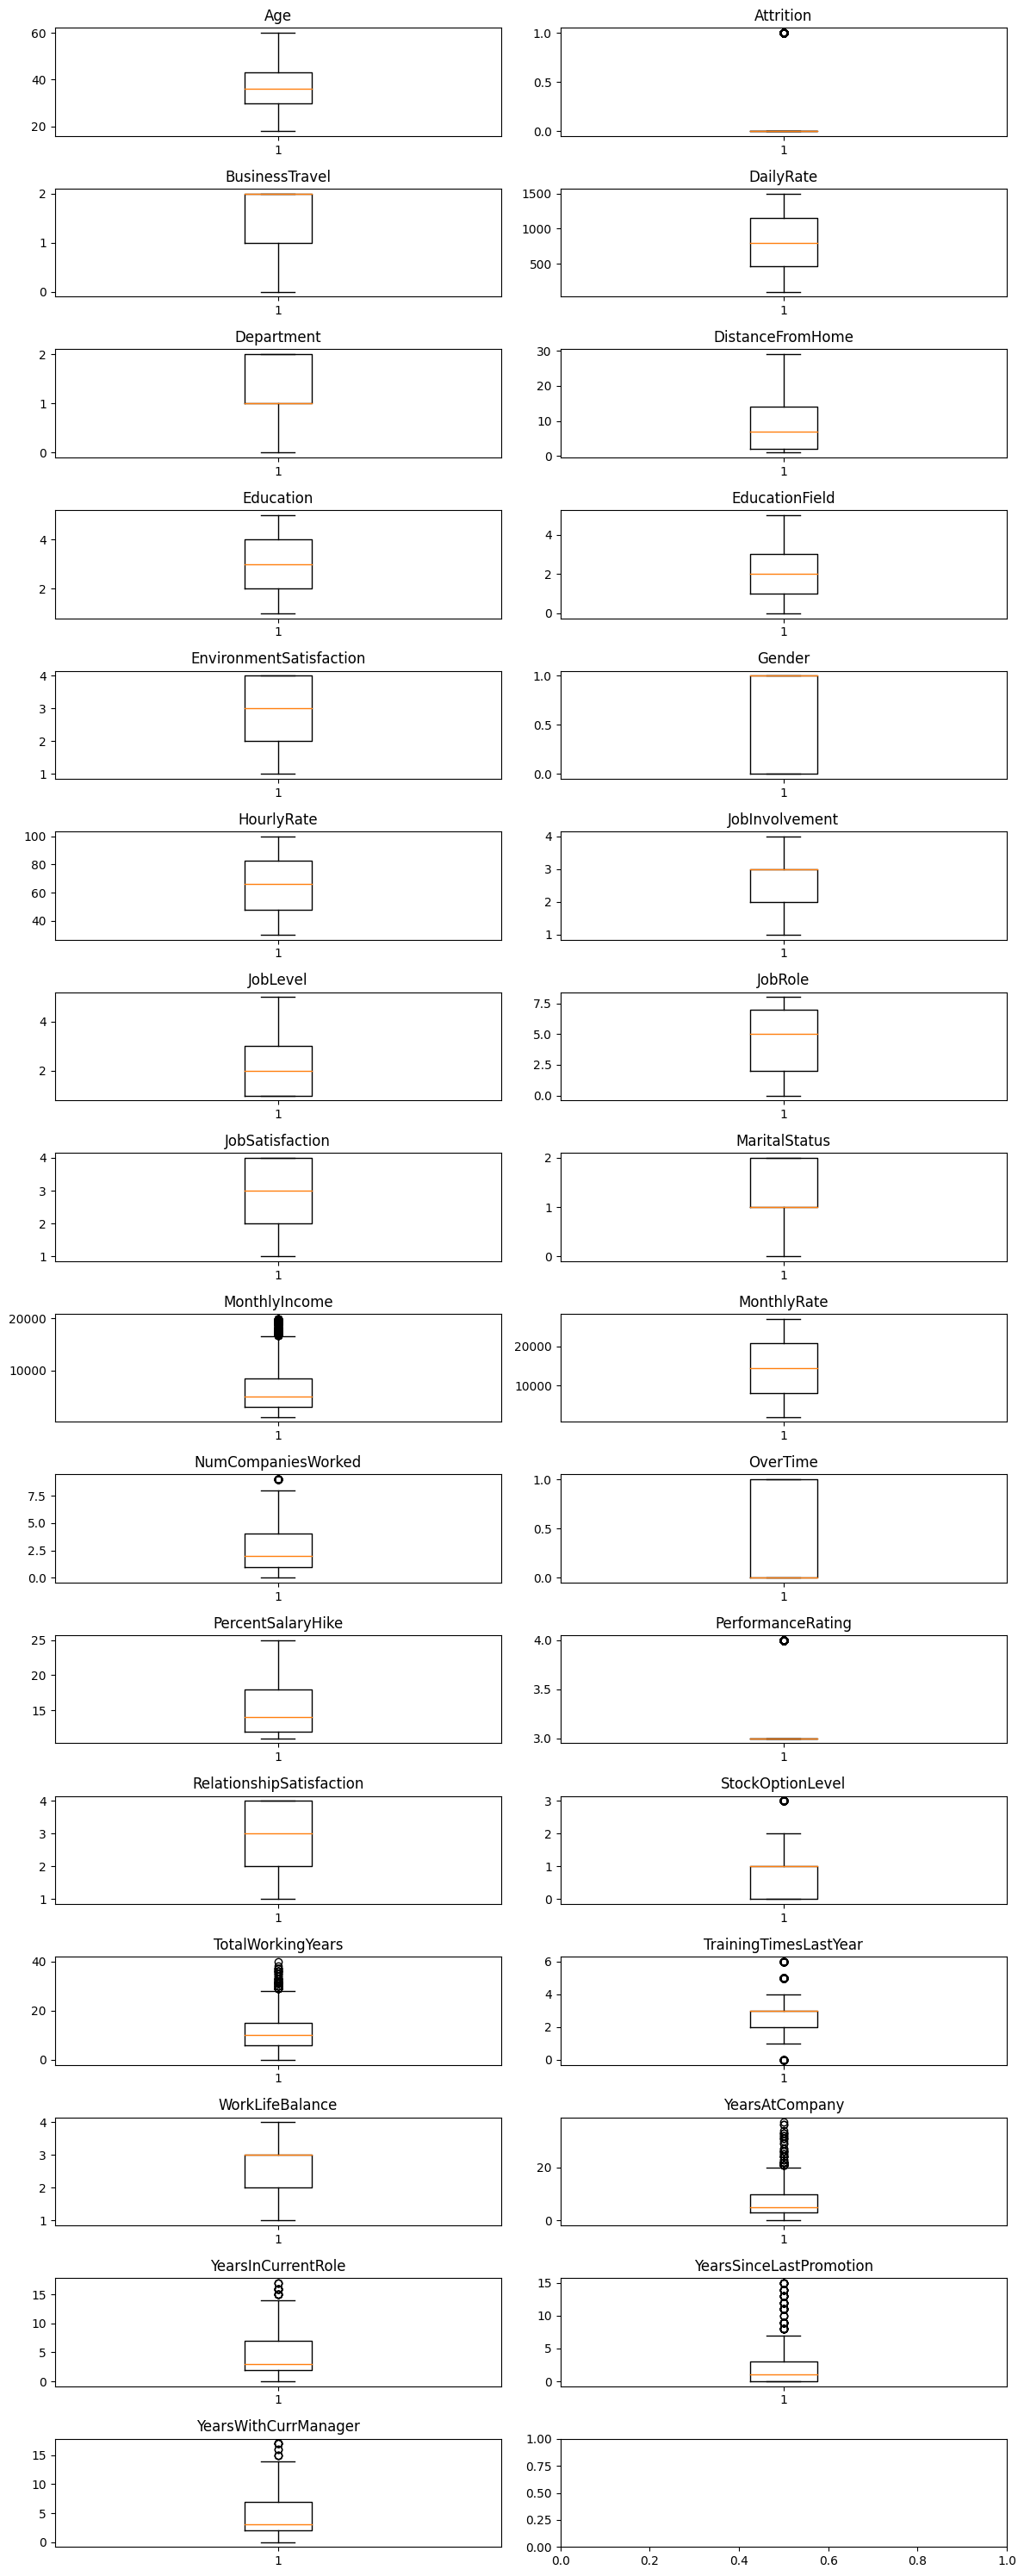

In [94]:
num_histograms = 31
num_cols = 2
num_rows = 16
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 30))

axes = axes.flatten()
for i, col in enumerate(train_set.columns[:num_histograms]):
    axes[i].boxplot(train_set[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [95]:
def num_outliers(data, name):
  data = data

  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1


  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = data[(data < lower_bound) | (data > upper_bound)]
  num_outliers = len(outliers)

  print("Number of outliers:{}, Column_Name:{}".format(num_outliers, name))


for i in train_set.columns:
  num_outliers(train_set[i], i)

Number of outliers:0, Column_Name:Age
Number of outliers:190, Column_Name:Attrition
Number of outliers:0, Column_Name:BusinessTravel
Number of outliers:0, Column_Name:DailyRate
Number of outliers:0, Column_Name:Department
Number of outliers:0, Column_Name:DistanceFromHome
Number of outliers:0, Column_Name:Education
Number of outliers:0, Column_Name:EducationField
Number of outliers:0, Column_Name:EnvironmentSatisfaction
Number of outliers:0, Column_Name:Gender
Number of outliers:0, Column_Name:HourlyRate
Number of outliers:0, Column_Name:JobInvolvement
Number of outliers:0, Column_Name:JobLevel
Number of outliers:0, Column_Name:JobRole
Number of outliers:0, Column_Name:JobSatisfaction
Number of outliers:0, Column_Name:MaritalStatus
Number of outliers:86, Column_Name:MonthlyIncome
Number of outliers:0, Column_Name:MonthlyRate
Number of outliers:36, Column_Name:NumCompaniesWorked
Number of outliers:0, Column_Name:OverTime
Number of outliers:0, Column_Name:PercentSalaryHike
Number of outl

A very logical explanation for Attrition to have 190 outliers would be that the amount of 1's are very less as compared to 0's.

Bivariate Analysis

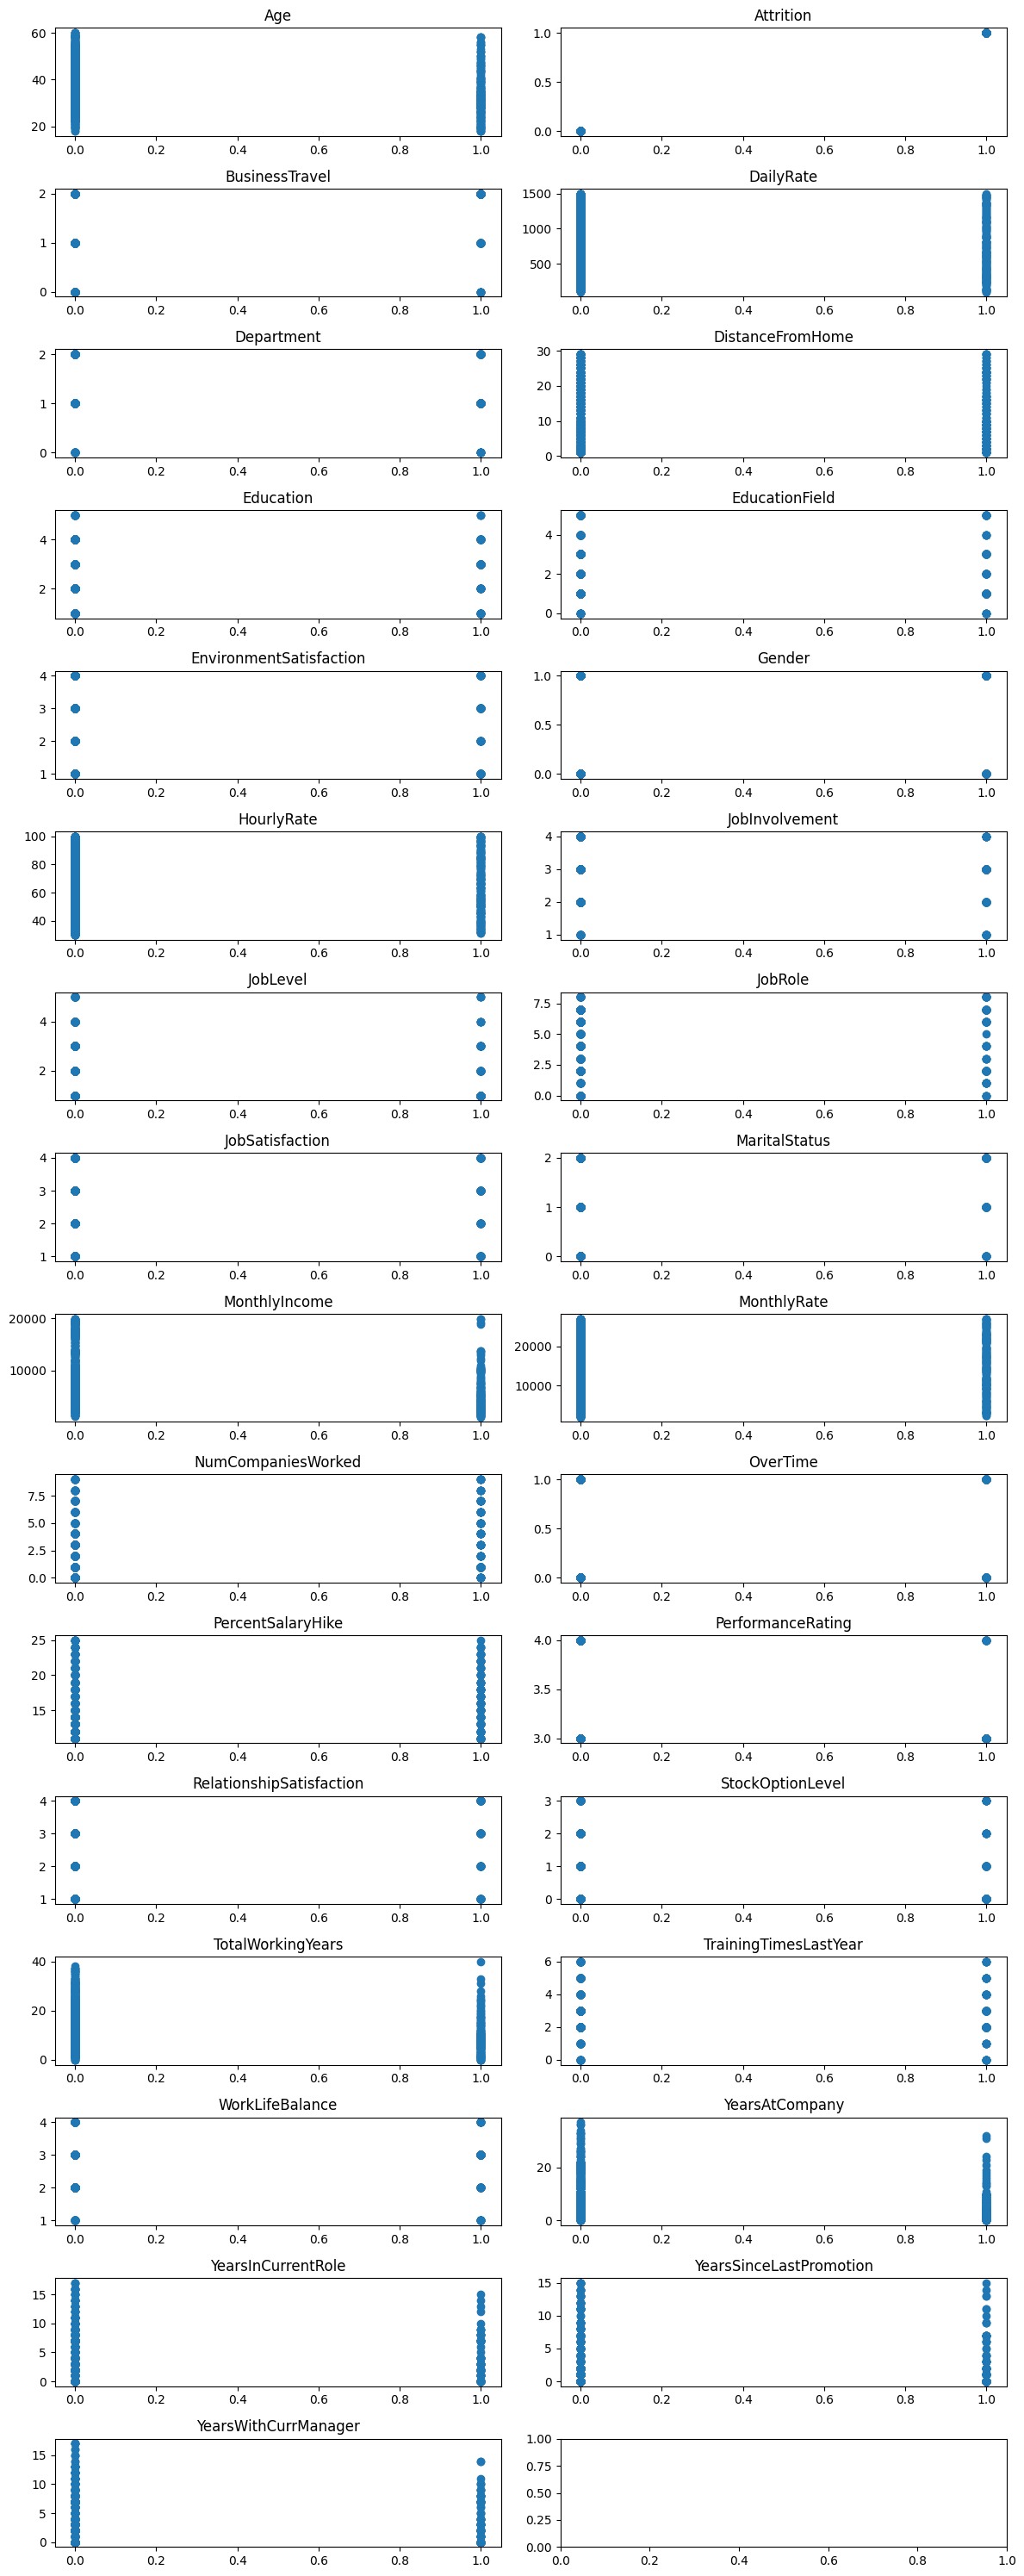

In [97]:
num_histograms = 31
num_cols = 2
num_rows = 16
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 30))

axes = axes.flatten()
for i, col in enumerate(train_set.columns[:num_histograms]):
    axes[i].scatter(train_set['Attrition'], train_set[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

## Correlations

In [99]:
train_set.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.185269,0.019802,0.024387,-0.025565,0.026070,0.200322,-0.027842,0.019456,-0.044777,...,0.025537,0.037142,0.032187,0.694507,-0.038122,-0.032473,0.313363,0.218484,0.211487,0.203502
Attrition,-0.185269,1.000000,0.003781,-0.071398,0.065474,0.086744,-0.029742,-0.008725,-0.112944,0.024785,...,0.007047,-0.043369,-0.142803,-0.186154,-0.039445,-0.080319,-0.155139,-0.167028,-0.042942,-0.168789
BusinessTravel,0.019802,0.003781,1.000000,0.011005,0.010972,-0.027523,-0.007477,0.040661,0.003066,-0.018222,...,-0.044967,-0.068824,-0.035302,0.022909,0.018242,-0.007326,-0.039070,-0.022777,-0.042981,-0.037198
DailyRate,0.024387,-0.071398,0.011005,1.000000,-0.006335,0.001514,-0.003387,0.027739,0.020719,-0.002625,...,-0.005306,0.006753,0.046350,0.021565,-0.009423,-0.040173,-0.025003,0.023581,-0.033547,-0.020495
Department,-0.025565,0.065474,0.010972,-0.006335,1.000000,0.003919,0.005583,0.018800,-0.033367,-0.036743,...,-0.038575,-0.018556,-0.026506,0.006353,0.053640,0.032754,0.044562,0.049217,0.063325,0.053815
DistanceFromHome,0.026070,0.086744,-0.027523,0.001514,0.003919,1.000000,0.043053,0.002087,-0.010683,-0.005522,...,0.027642,0.006785,0.034329,0.017810,-0.048123,-0.012456,0.012665,0.020539,0.009547,0.012793
Education,0.200322,-0.029742,-0.007477,-0.003387,0.005583,0.043053,1.000000,-0.014752,-0.054864,-0.034018,...,-0.006127,0.016969,0.021524,0.141366,-0.013429,-0.008829,0.059782,0.048809,0.055387,0.077941
EducationField,-0.027842,-0.008725,0.040661,0.027739,0.018800,0.002087,-0.014752,1.000000,0.037011,0.006985,...,-0.018675,-0.020962,0.011837,-0.029484,0.060517,0.053778,-0.022477,-0.008089,0.014604,-0.006716
EnvironmentSatisfaction,0.019456,-0.112944,0.003066,0.020719,-0.033367,-0.010683,-0.054864,0.037011,1.000000,-0.001041,...,-0.037803,0.000769,0.004937,-0.014983,-0.022309,0.034071,0.001632,0.012706,0.003131,-0.004515
Gender,-0.044777,0.024785,-0.018222,-0.002625,-0.036743,-0.005522,-0.034018,0.006985,-0.001041,1.000000,...,-0.017859,0.052331,0.004648,-0.067365,-0.034791,-0.013021,-0.043147,-0.064096,-0.031688,-0.062456


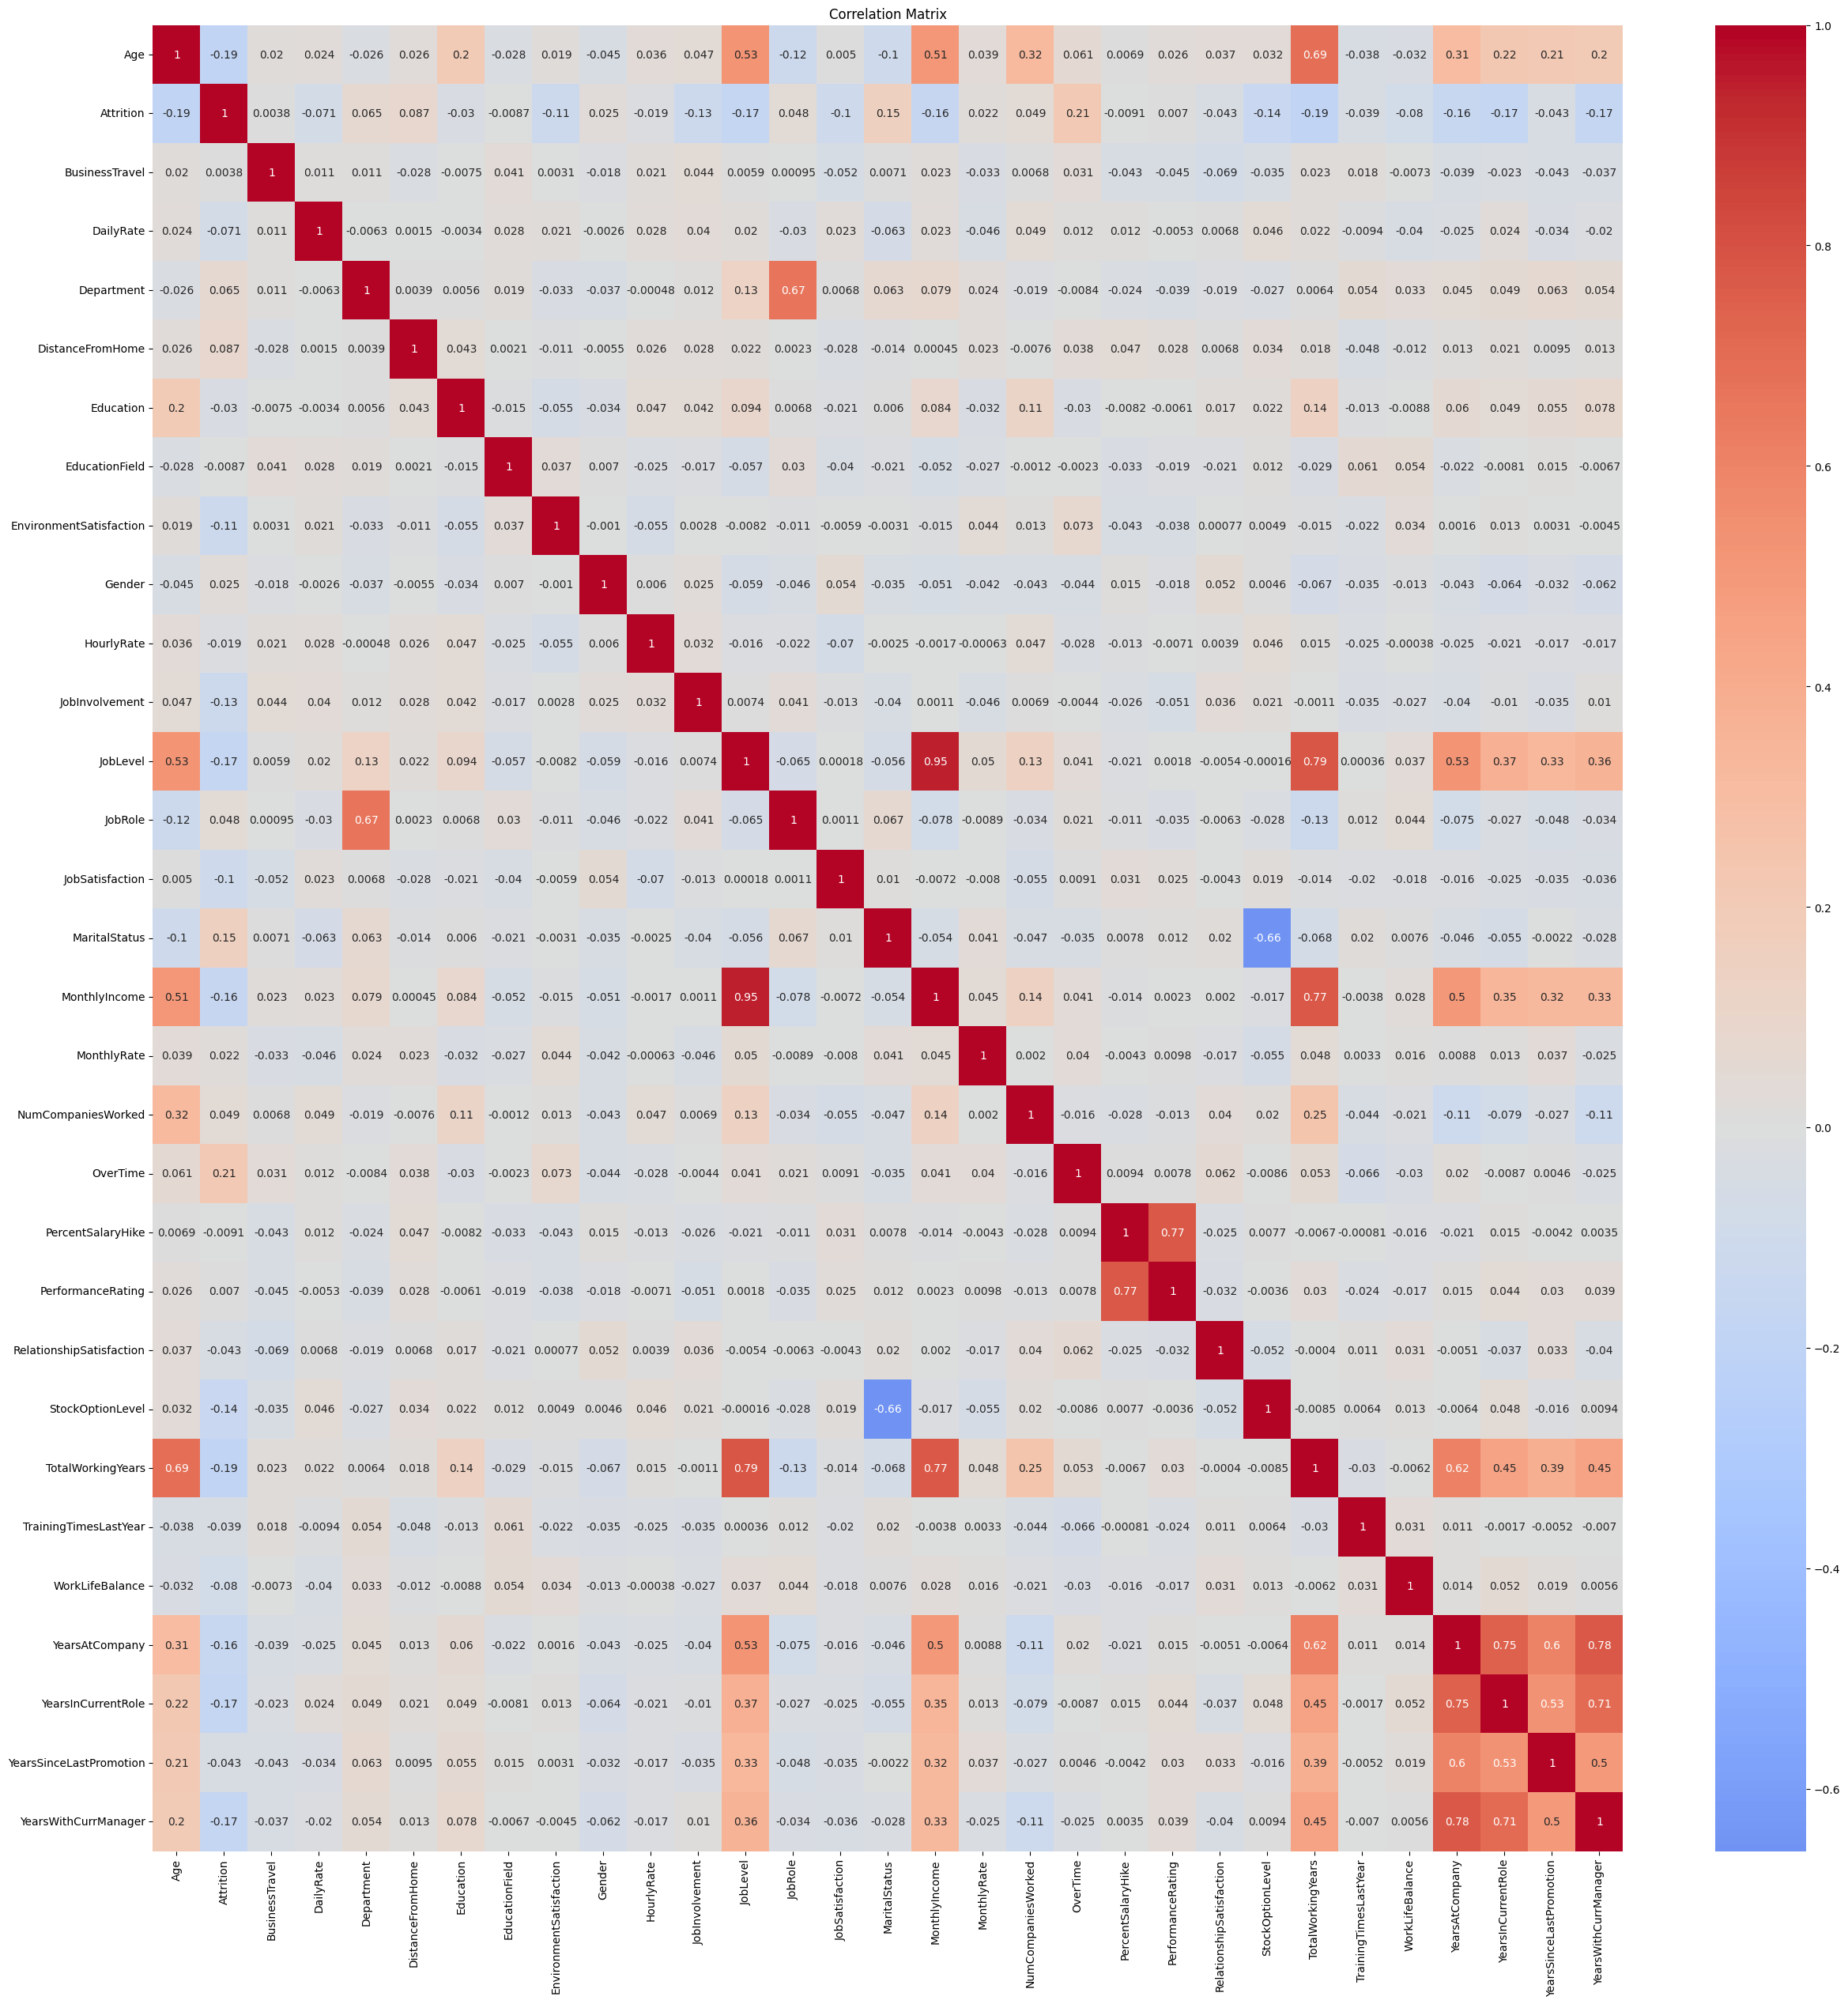

In [101]:
plt.figure(figsize=(30, 30))
sns.heatmap(train_set.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

High correaltion between the independent variables and the dependant variable is not so obvious in this case except for OverTime.
With the increase in over time, the attrition increases.

## Skewness

The data doesn't seem to be much skewed either.

In [102]:
train_set.skew()

,0
Age,0.403687
Attrition,1.841418
BusinessTravel,-1.409686
DailyRate,-0.004044
Department,0.171291
DistanceFromHome,0.928220
Education,-0.297102
EducationField,0.558743
EnvironmentSatisfaction,-0.328479
Gender,-0.402982


## VIF

As of now we won't delete any columns.

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = train_set.columns
vif['VIF'] = [variance_inflation_factor(train_set.values, i) for i in range(train_set.shape[1])]
vif

,Features,VIF
0,Age,35.102532
1,Attrition,1.480362
2,BusinessTravel,6.630794
3,DailyRate,5.044008
4,Department,13.738816
5,DistanceFromHome,2.370483
6,Education,9.417116
7,EducationField,3.870855
8,EnvironmentSatisfaction,7.283785
9,Gender,2.533779


## Splitting the data into X_train, y_train, X_test, y_test

In [105]:
X_train = train_set.drop('Attrition', axis=1)
y_train = train_set['Attrition']
X_test = test_set.drop('Attrition', axis=1)
y_test = test_set['Attrition']

In [106]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [107]:
X_train.shape

(1176, 30)

In [108]:
y_train.shape

(1176,)

In [109]:
X_test.shape

(294, 30)

In [110]:
y_test.shape

(294,)

## Scaling the data

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## PCA

In [173]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

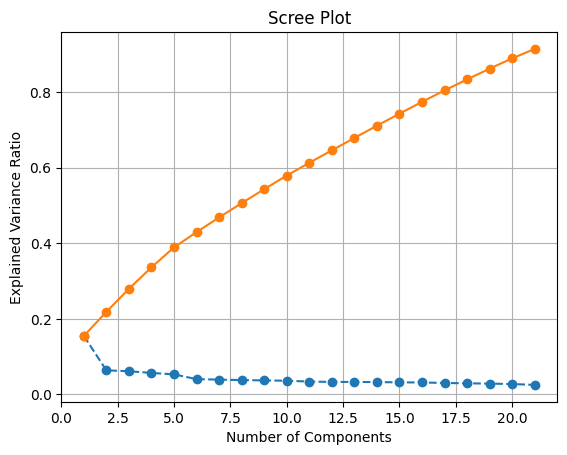

In [174]:
explained_variance_ratio_ = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratio_) + 1), explained_variance_ratio_, marker='o', linestyle='--')
plt.plot(range(1, len(explained_variance_ratio_) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [175]:
pca.explained_variance_ratio_

array([0.15469461, 0.06359744, 0.06118428, 0.05674497, 0.05292914,
       0.04030199, 0.03899747, 0.03782188, 0.03688392, 0.03613183,
       0.03379528, 0.03297673, 0.03282766, 0.03243646, 0.03176485,
       0.0313889 , 0.03021365, 0.02919392, 0.02844277, 0.027305  ,
       0.02496469])

## Models with PCA

In [176]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [177]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_pca, y_train)
sgd_clf.score(X_test_pca, y_test)

0.8435374149659864

In [178]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_pca, y_train)
lr.score(X_test_pca, y_test)

0.8707482993197279

In [179]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_pca, y_train)
dt.score(X_test_pca, y_test)

0.7721088435374149

In [180]:
rt = RandomForestClassifier(random_state=42)
rt.fit(X_train_pca, y_train)
rt.score(X_test_pca, y_test)

0.8401360544217688

In [181]:
svc_clf = SVC(random_state=42)
svc_clf.fit(X_train_pca, y_train)
svc_clf.score(X_test_pca, y_test)

0.8605442176870748

In [182]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_pca, y_train)
knn_clf.score(X_test_pca, y_test)

0.8503401360544217

## Conclusion

Random Logistic Regression is the best model as it gives over 87% accuracy on the Test Set.

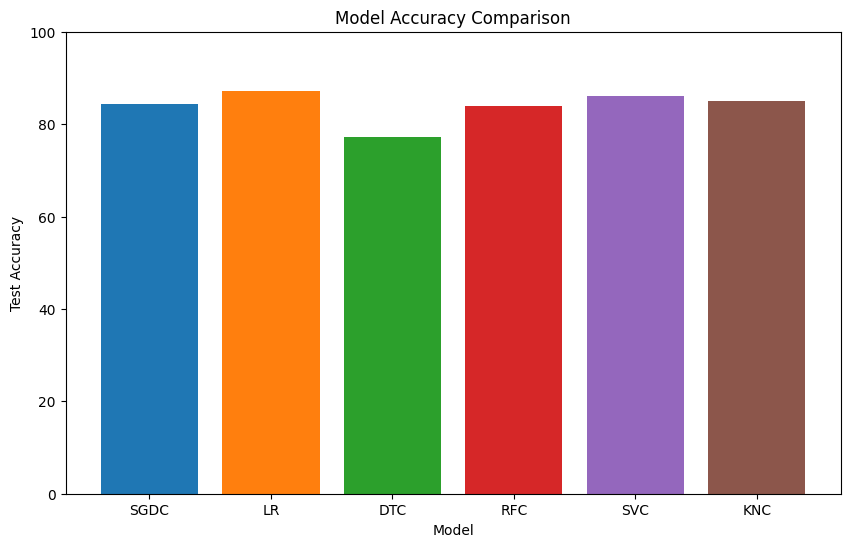

In [185]:
model_names = ['SGDC', 'LR', 'DTC', 'RFC', 'SVC', 'KNC']
accuracy_scores = [ 0.8435374149659864 * 100, 0.8707482993197279 * 100, 0.7721088435374149 * 100,
                    0.8401360544217688 * 100,0.8605442176870748 * 100, 0.8503401360544217 * 100 ]
colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=colours)
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)
plt.show()